In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
import random
random.seed(108448)
from scipy.stats import poisson

#%pip install gurobipy
import gurobipy as gp
from gurobipy import GRB

In [90]:
#Define the number of elememts in each set I, J, K
i_num = 15
k_num = 1
j_num = 100 #Without I and K, so real j_num_real = j_num + i_num + k_num

#Define empty data frames
I = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longtitude'])
J = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longtitude'])
K = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longtitude'])


In [91]:
#Define sets of I, J, K, where J contains I and K

for i in range(i_num):
    I.loc[i, 'Point number'] = 'i'+ str(i)
    I.loc[i, 'Latitude'] = round(random.uniform(0, 100), 4)
    I.loc[i, 'Longtitude'] = round(random.uniform(0, 100), 4)

I.index = I['Point number']
    
    
for k in range(k_num):
    K.loc[k, 'Point number'] = 'k'+ str(k)
    K.loc[k, 'Latitude'] = round(random.uniform(0, 100), 4)
    K.loc[k, 'Longtitude'] = round(random.uniform(0, 100), 4)

K.index = K['Point number']


for j in range(j_num):
    J.loc[j, 'Point number'] = 'j'+ str(j)
    J.loc[j, 'Latitude'] = round(random.uniform(0, 100), 4)
    J.loc[j, 'Longtitude'] = round(random.uniform(0, 100), 4)

J.index = J['Point number'] 
J = pd.concat([J, K], axis = 0) #Include K to J
I.index

Index(['i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10',
       'i11', 'i12', 'i13', 'i14'],
      dtype='object', name='Point number')

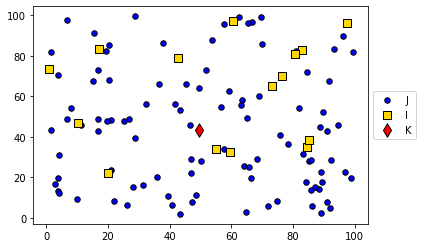

In [92]:
plt.scatter(J['Latitude'], J['Longtitude'], color = 'blue', edgecolors = 'black',
            marker = 'o', s = 30, label = 'J')
plt.scatter(I['Latitude'], I['Longtitude'], color = 'gold', edgecolors = 'black',
            marker = 's', s = 50, label = 'I')
plt.scatter(K['Latitude'], K['Longtitude'], color = 'red', edgecolors = 'black',
            marker = 'd', s = 90, label = 'K')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [93]:
#Define constants

B = 100
S = 10
alpha = 10
beta = 400
q_j = {j: 50 for j in J.index}
up_bound = 12
mu = {i : int(round(random.uniform(0, up_bound), 0)) for i in I.index}
mu

{'i0': 10,
 'i1': 4,
 'i2': 7,
 'i3': 6,
 'i4': 12,
 'i5': 5,
 'i6': 11,
 'i7': 1,
 'i8': 9,
 'i9': 8,
 'i10': 10,
 'i11': 5,
 'i12': 5,
 'i13': 7,
 'i14': 5}

Deterministic model

In [94]:
theta_det = {}
for n in I.index:
    theta_det[n] = list(poisson.rvs(mu[n], size = 1))[0]
theta_det

{'i0': 13,
 'i1': 2,
 'i2': 7,
 'i3': 7,
 'i4': 8,
 'i5': 10,
 'i6': 6,
 'i7': 0,
 'i8': 13,
 'i9': 6,
 'i10': 12,
 'i11': 4,
 'i12': 7,
 'i13': 7,
 'i14': 7}

In [95]:
#Define distance matrices

def distance(point1, PointsSet1, point2, PointsSet2):
    c1 = np.array((PointsSet1.loc[point1, 'Latitude'], PointsSet1.loc[point1, 'Longtitude']))
    c2 = np.array((PointsSet2.loc[point2, 'Latitude'], PointsSet2.loc[point2, 'Longtitude']))
    return np.linalg.norm(c1-c2)

dist_JI = {(c1, c2): distance(c1, J, c2, I)for c1, c2 in itertools.product(J.index, I.index)}
dist_IK = {(c1, c2): distance(c1, I, c2, K)for c1, c2 in itertools.product(I.index, K.index)}
dist_KJ = {(c1, c2): distance(c1, K, c2, J)for c1, c2 in itertools.product(K.index, J.index)}
 
dist_KJ


{('k0', 'j0'): 20.610534417622457,
 ('k0', 'j1'): 29.147403584024424,
 ('k0', 'j2'): 27.068736046221293,
 ('k0', 'j3'): 52.65707135836554,
 ('k0', 'j4'): 38.67285850890776,
 ('k0', 'j5'): 39.29505438601657,
 ('k0', 'j6'): 23.219476089050758,
 ('k0', 'j7'): 41.212417563642155,
 ('k0', 'j8'): 25.814382501621072,
 ('k0', 'j9'): 47.12960665282493,
 ('k0', 'j10'): 52.76688282521528,
 ('k0', 'j11'): 54.61355882644896,
 ('k0', 'j12'): 29.085347093167037,
 ('k0', 'j13'): 43.42952123935975,
 ('k0', 'j14'): 34.879126162362496,
 ('k0', 'j15'): 47.59403329010897,
 ('k0', 'j16'): 32.24848978494962,
 ('k0', 'j17'): 29.636980772676562,
 ('k0', 'j18'): 25.560151370835037,
 ('k0', 'j19'): 20.118307540148603,
 ('k0', 'j20'): 34.427811261536796,
 ('k0', 'j21'): 21.289978572558496,
 ('k0', 'j22'): 57.224222071863935,
 ('k0', 'j23'): 41.364091248327945,
 ('k0', 'j24'): 21.501188937591337,
 ('k0', 'j25'): 23.33028397362535,
 ('k0', 'j26'): 55.13141140602152,
 ('k0', 'j27'): 58.97689578953779,
 ('k0', 'j28')

In [96]:
#Define set L
L = list()
for k, j in itertools.product(K.index, J.index):
    if dist_KJ[(k, j)] <= 0.5*B:
        L.append((k, j))
        
L

[('k0', 'j0'),
 ('k0', 'j1'),
 ('k0', 'j2'),
 ('k0', 'j4'),
 ('k0', 'j5'),
 ('k0', 'j6'),
 ('k0', 'j7'),
 ('k0', 'j8'),
 ('k0', 'j9'),
 ('k0', 'j12'),
 ('k0', 'j13'),
 ('k0', 'j14'),
 ('k0', 'j15'),
 ('k0', 'j16'),
 ('k0', 'j17'),
 ('k0', 'j18'),
 ('k0', 'j19'),
 ('k0', 'j20'),
 ('k0', 'j21'),
 ('k0', 'j23'),
 ('k0', 'j24'),
 ('k0', 'j25'),
 ('k0', 'j31'),
 ('k0', 'j32'),
 ('k0', 'j33'),
 ('k0', 'j34'),
 ('k0', 'j35'),
 ('k0', 'j36'),
 ('k0', 'j37'),
 ('k0', 'j38'),
 ('k0', 'j39'),
 ('k0', 'j41'),
 ('k0', 'j42'),
 ('k0', 'j43'),
 ('k0', 'j44'),
 ('k0', 'j45'),
 ('k0', 'j46'),
 ('k0', 'j48'),
 ('k0', 'j50'),
 ('k0', 'j52'),
 ('k0', 'j53'),
 ('k0', 'j54'),
 ('k0', 'j55'),
 ('k0', 'j56'),
 ('k0', 'j59'),
 ('k0', 'j63'),
 ('k0', 'j65'),
 ('k0', 'j67'),
 ('k0', 'j68'),
 ('k0', 'j69'),
 ('k0', 'j70'),
 ('k0', 'j71'),
 ('k0', 'j72'),
 ('k0', 'j73'),
 ('k0', 'j74'),
 ('k0', 'j76'),
 ('k0', 'j77'),
 ('k0', 'j78'),
 ('k0', 'j79'),
 ('k0', 'j81'),
 ('k0', 'j82'),
 ('k0', 'j83'),
 ('k0', 'j85'),
 

In [97]:
#Define sets M_kj

M_kj = {}
M_interim = []

for (k, j) in L:
    for i in I.index:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] + dist_KJ[k, j] <= B:
                M_interim.append(i)
    M_kj[(k, j)] = M_interim
    M_interim = []

M_kj_interim = {key : val for key, val in M_kj.items() if val != []}  

KJ_feas = list(M_kj_interim.keys())
KJ_feas


[('k0', 'j4'),
 ('k0', 'j5'),
 ('k0', 'j14'),
 ('k0', 'j17'),
 ('k0', 'j18'),
 ('k0', 'j23'),
 ('k0', 'j25'),
 ('k0', 'j31'),
 ('k0', 'j32'),
 ('k0', 'j33'),
 ('k0', 'j35'),
 ('k0', 'j36'),
 ('k0', 'j39'),
 ('k0', 'j42'),
 ('k0', 'j43'),
 ('k0', 'j52'),
 ('k0', 'j56'),
 ('k0', 'j70'),
 ('k0', 'j82'),
 ('k0', 'j87'),
 ('k0', 'j89'),
 ('k0', 'j92'),
 ('k0', 'j96'),
 ('k0', 'j97')]

In [98]:
#Define sets N_i

N_i = {}
N_interim = []

for i in I.index:
    for (k, j) in L:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] + dist_KJ[k, j] <= B:
                N_interim.append((k, j))
    N_i[i] = N_interim
    N_interim = []
    
N_i_interim = {key : val for key, val in N_i.items() if val != []}   
 
I_feas = list(N_i_interim.keys())
I_feas

['i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i10', 'i11']

In [99]:
model_det = gp.Model('Deterministic model')

x_ikj = model_det.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_det.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')

In [100]:
model_det.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i[i]) >= theta_det[i] for i in I_feas), name = 'c2')
model_det.addConstrs((gp.quicksum(x_ikj[i, k, j] for i in M_kj[(k, j)]) <= q_j[j] * y_j[j] for (k, j) in KJ_feas), name = 'c4')
model_det.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * y_j[j] <= B
                  for (k, j) in N_i[i] for i in M_kj[(k, j)]), name = 'c5')
model_det.addConstrs((dist_JI[(j, i)] * y_j[j] <= S for (k, j) in N_i[i] for i in M_kj[(k, j)]), name = 'c6')

{}

In [101]:
model_det.setObjective(alpha * gp.quicksum(x_ikj) + beta * gp.quicksum(y_j), GRB.MINIMIZE)

In [102]:
model_det.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 33 rows, 1241 columns and 82 nonzeros
Model fingerprint: 0xca466fbf
Variable types: 0 continuous, 1241 integer (101 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+01, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 1e+01]
Found heuristic solution: objective 3890.0000000
Presolve removed 24 rows and 1223 columns
Presolve time: 0.00s
Presolved: 9 rows, 18 columns, 29 nonzeros
Found heuristic solution: objective 3490.0000000
Variable types: 0 continuous, 18 integer (7 binary)

Root relaxation: cutoff, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   G

In [103]:
def ListSolution(model):
        nSolutions = model_det.SolCount
        print('Number of solutions found: ' + str(nSolutions))
        for e in range(nSolutions):
        #for iter2 in range(1):
                model_det.setParam(GRB.Param.SolutionNumber, e)
                print('%g ' % model_det.PoolObjVal, end='\n')
                for v in model_det.getVars():
                        if v.xn > 0:
                                print ('%s %g' % (v.varName, v.Xn))
                print("\n")
        print("\n")
        
ListSolution(model_det)

Number of solutions found: 2
3490 
x_ikj[i0,k0,j17] 13
x_ikj[i1,k0,j97] 2
x_ikj[i2,k0,j96] 7
x_ikj[i3,k0,j18] 7
x_ikj[i4,k0,j17] 8
x_ikj[i5,k0,j39] 10
x_ikj[i6,k0,j14] 6
x_ikj[i10,k0,j70] 12
x_ikj[i11,k0,j97] 4
y_j[j14] 1
y_j[j17] 1
y_j[j18] 1
y_j[j39] 1
y_j[j70] 1
y_j[j96] 1
y_j[j97] 1


3890 
x_ikj[i0,k0,j17] 13
x_ikj[i1,k0,j36] 2
x_ikj[i2,k0,j56] 7
x_ikj[i3,k0,j18] 7
x_ikj[i4,k0,j17] 8
x_ikj[i5,k0,j39] 10
x_ikj[i6,k0,j14] 6
x_ikj[i10,k0,j70] 12
x_ikj[i11,k0,j97] 4
y_j[j14] 1
y_j[j17] 1
y_j[j18] 1
y_j[j36] 1
y_j[j39] 1
y_j[j56] 1
y_j[j70] 1
y_j[j97] 1






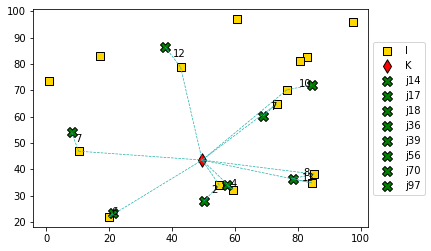

In [104]:
def SolutionGraph(I, K, J, model):
    
    # plt.scatter(J['Latitude'], J['Longtitude'], color = 'blue', edgecolors = 'black',
    #             marker = 'o', s = 30, label = 'J')
    plt.scatter(I['Latitude'], I['Longtitude'], color = 'gold', edgecolors = 'black',
                marker = 's', s = 50, label = 'I')
    plt.scatter(K['Latitude'], K['Longtitude'], color = 'red', edgecolors = 'black',
                marker = 'd', s = 90, label = 'K')
    for v in model.getVars():
        if v.xn > 0:
            if v.varName.startswith('x_ikj'):
                indices_x = v.varName[6:-1].split(',') #drop variable name and brackets and convert to a list of indices
                plt.plot((J.loc[indices_x[2], 'Latitude'], I.loc[indices_x[0], 'Latitude']),
                        (J.loc[indices_x[2], 'Longtitude'], I.loc[indices_x[0], 'Longtitude']),
                        color = 'lightseagreen', linestyle = "--", linewidth = 0.7)
                plt.plot((I.loc[indices_x[0], 'Latitude'], K.loc[indices_x[1], 'Latitude']),
                        (I.loc[indices_x[0], 'Longtitude'], K.loc[indices_x[1], 'Longtitude']),
                        color = 'lightseagreen', linestyle = "--", linewidth = 0.7)
                plt.annotate(str(int(v.xn)), xy = ((J.loc[indices_x[2], 'Latitude'] + I.loc[indices_x[0], 'Latitude'])/2,
                                                (J.loc[indices_x[2], 'Longtitude'] + I.loc[indices_x[0], 'Longtitude'])/2))
            else:
                index_y = v.varName[4:-1]
                plt.scatter(J.loc[index_y, 'Latitude'], J.loc[index_y, 'Longtitude'], color = 'green',
                            edgecolors = 'black', s = 100, marker = 'X', label = index_y)
    plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
    

SolutionGraph(I, K, J, model_det)

Probabilistic model

In [105]:
#Define constants and random variables

theta_ran_i = {}
for n in list(I.index):
    theta_ran_i[n] = poisson(mu[n])

p = 0.97

l_i = {}
for i in theta_ran_i.keys():
    l_i[i] = int(theta_ran_i[i].ppf(p))

g_i = {}
for i in theta_ran_i.keys():
    g_i[i] = up_bound * 2

IG = []
for i in I.index:
    for g in range(1, g_i[i] + 1):
        IG.append((i, g))

I_feasG = []
for i in I_feas:
    for g in range(1, g_i[i] + 1):
        I_feasG.append((i, g))
        

h_ig = {}
for (i, g) in IG:
    h_ig[(i, g)] = math.log(theta_ran_i[i].cdf(l_i[i] + g)) - math.log(theta_ran_i[i].cdf(l_i[i] + g - 1))


phi = float(math.log(p) - sum(theta_ran_i[i].cdf(l_i[i]) for i in I_feas))

In [106]:
model_prob = gp.Model('Probabilistic model without relaxation')

x_ikj = model_prob.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_prob.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')
z_ig = model_prob.addVars(IG, vtype = GRB.BINARY, name = 'z_ig')

In [107]:
#Probabilistic constraints

model_prob.addConstr((gp.quicksum(h_ig[ig] * z_ig[ig] for ig in I_feasG)) >= phi, name = 'c15')
model_prob.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i[i]) == l_i[i] + gp.quicksum(z_ig) for (i, g) in I_feasG), name = 'c16')

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


{('i0', 1): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 2): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 3): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 4): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 5): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 6): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 7): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 9): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 10): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 11): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 12): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 13): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 14): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 15): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 16): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 17): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 18): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 19): <gurobi.Constr *Awaiting

In [108]:
#Same constraints as in the deterministic model

model_prob.addConstrs((gp.quicksum(x_ikj[i, k, j] for i in M_kj[(k, j)]) <= q_j[j] * y_j[j] for (k, j) in KJ_feas), name = 'c17')
model_prob.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * y_j[j] <= B
                  for (k, j) in N_i[i] for i in M_kj[(k, j)]), name = 'c18')
model_prob.addConstrs((dist_JI[(j, i)] * y_j[j] <= S for (k, j) in N_i[i] for i in M_kj[(k, j)]), name = 'c19')

{}

In [109]:
model_prob.setObjective(alpha * gp.quicksum(x_ikj) + beta * gp.quicksum(y_j), GRB.MINIMIZE)
model_prob.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 241 rows, 1601 columns and 78703 nonzeros
Model fingerprint: 0xe77ba1a8
Variable types: 0 continuous, 1601 integer (461 binary)
Coefficient statistics:
  Matrix range     [1e-13, 5e+01]
  Objective range  [1e+01, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [8e+00, 2e+01]
Found heuristic solution: objective 4400.0000000
Presolve removed 216 rows and 1555 columns
Presolve time: 0.03s
Presolved: 25 rows, 46 columns, 75 nonzeros
Variable types: 0 continuous, 46 integer (20 binary)

Root relaxation: objective 3.333091e+03, 27 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0 

In [110]:
ListSolution(model_prob)

Number of solutions found: 2
3490 
x_ikj[i0,k0,j17] 13
x_ikj[i1,k0,j97] 2
x_ikj[i2,k0,j96] 7
x_ikj[i3,k0,j18] 7
x_ikj[i4,k0,j17] 8
x_ikj[i5,k0,j39] 10
x_ikj[i6,k0,j14] 6
x_ikj[i10,k0,j70] 12
x_ikj[i11,k0,j97] 4
y_j[j14] 1
y_j[j17] 1
y_j[j18] 1
y_j[j39] 1
y_j[j70] 1
y_j[j96] 1
y_j[j97] 1


3890 
x_ikj[i0,k0,j17] 13
x_ikj[i1,k0,j36] 2
x_ikj[i2,k0,j56] 7
x_ikj[i3,k0,j18] 7
x_ikj[i4,k0,j17] 8
x_ikj[i5,k0,j39] 10
x_ikj[i6,k0,j14] 6
x_ikj[i10,k0,j70] 12
x_ikj[i11,k0,j97] 4
y_j[j14] 1
y_j[j17] 1
y_j[j18] 1
y_j[j36] 1
y_j[j39] 1
y_j[j56] 1
y_j[j70] 1
y_j[j97] 1






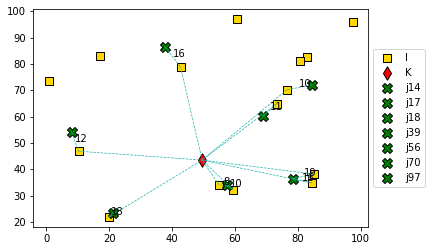

In [111]:
SolutionGraph(I, K, J, model_prob)

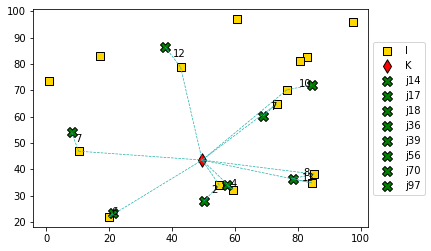

In [112]:
SolutionGraph(I, K, J, model_det)